In [1]:
import numpy 

In [2]:
input = numpy.loadtxt("Input.txt")

In [3]:
input.sum()

np.float64(11.0)

In [4]:
import numpy 

def log_likelihood(theta: float) -> float:
    n_heads = input.sum()
    n_tails = len(input) - n_heads
    ll = n_heads * numpy.log(theta) + n_tails * numpy.log(1 - theta)
    return ll 

thetas = [0.3, 0.4, 0.5, 0.6, 0.7]
input = numpy.loadtxt("Input.txt")

log_liks = list(map(log_likelihood, thetas))



In [5]:
list(log_liks)

[np.float64(-18.950499950605014),
 np.float64(-18.252408030871557),
 np.float64(-18.714973875118524),
 np.float64(-20.27973357141238),
 np.float64(-23.186989252541032)]

In [ ]:
float('%1.3f' % 0.00043214315) 

0.0

In [7]:
import Exc8Task1c
import plotly.express as px

In [14]:
# log-likelihood
x = numpy.linspace(0,1)
y = numpy.array([Exc8Task1c.log_likelihood(theta=theta) for theta in x])
fig = px.line(x=x, y=y)
fig.show()

/Users/adm_caley/repos/found-in-maths-2025/hw6/Exc8Task1c.py:13: RuntimeWarning:

divide by zero encountered in log



In [17]:
# likelihood
x = numpy.linspace(0,1)
y = numpy.array([Exc8Task1c.likelihood(theta=theta) for theta in x])
fig = px.line(x=x, y=y)
fig.show()

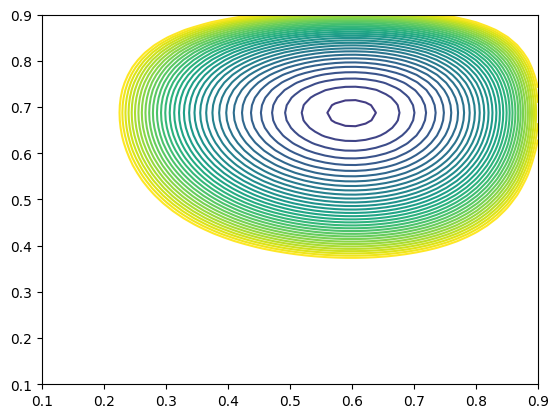

In [28]:
import numpy 
import matplotlib.pyplot as plt

EPS = 1e-12

def likelihood(theta_1: float, theta_2: float, input: numpy.ndarray):
    mapping = {
        (0, 0): theta_1, 
        (0, 1): 1 - theta_1,
        (1, 1): theta_2, 
        (1, 0): 1 - theta_2
    }

    neg_log_lik = 0 

    for i in range(len(input)-1):
        neg_log_lik -= numpy.log(mapping[(input[i], input[i+1])] + EPS)
    
    return neg_log_lik
    
input = numpy.loadtxt("Input.txt")

theta_i = numpy.linspace(0.1, 0.9, 50)
z = numpy.zeros((50, 50))


for i in range(len(theta_i)):
    for j in range(len(theta_i)):
        neg_ll = likelihood(theta_i[i], theta_i[j], input)
        z[i, j] = neg_ll
    
levels = numpy.arange(16, 20, 0.1)
plt.contour(theta_i, theta_i, z, levels)

In [33]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized::

        fun(x, *args) -> float

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.

    Suppose the callable has signature ``f0(x, *my_args, **my_kwargs)``, where
    ``my_args`` and ``my_kwargs`` are required positional and keyword arguments.
    Rather than passing ``f0`` as the callable, wrap it to accept
    only ``x``; e.g., pass ``fun=lambda x: f0(x, *my_args, **my_kwargs)`` as the
    callable, where ``my_args`` (tuple) and ``my_kwargs`` (dict) have been
    gathered before invoking this function.
x0 : ndarray, shape (n,)
    Initial gu

In [38]:
from scipy.optimize import minimize
import numpy

import Exc8Task2d

input = numpy.loadtxt("Input.txt")

theta_0 = [0.5, 0.5]
bounds = ((0, 1), (0, 1))

opt = minimize(fun=lambda thetas: Exc8Task2d.likelihood(thetas, input), x0 = theta_0, bounds = bounds)
opt.x


numpy.savetxt("Exc8Task2e.txt", opt.x, fmt='%1.2f')